# Робота №4. Вивчення структури металів за допомогою функції радіального розподілу атомів

## Мета роботи
Дослідження параметрів структури металів в кристалічному та рідкому стані за допомогою визначення ФРР атомів моделюванням методом молекулярної динаміки.

## Об'єкт дослідження
Чисті метали за умов різних температур.

## Програма проведення експерименту
Створити кристал з ~1000-2000 атомів з періодичними граничними умовами. Матеріал: Pt.

In [1]:
%%writefile lab4.xm
read ../pot/Pt_xmd.eam

box 9 9 9

fill particle 4
1     0.0        0.0        0.0
1     0.5        0.0        0.5
1     0.5        0.5        0.0
1     0.0        0.5        0.5

fill align 8 8 8
fill orient 1 0 0  0 1 0  0 0 1
fill go

dtime 1e-14

select all #
mass 195.084

clamp $1
itemp $1
scale 3.9231

select index 14571
set add 1
select keep on

cmd 1000
#write file +lab2_pos_vel_$1.txt sel posvel
write pdb +lab4_$2.pdb
#WRITE file +lab4_$2.rdf RDF 160 2 18

Overwriting lab4.xm


In [1]:
Tmelt = 2041.4 # Kelvin
T = [0.1*Tmelt, 1.5*Tmelt]

In [3]:
for i, temp in enumerate(T):
    !del /f lab4_{i}.pdb
    #!del /f lab4_{i}.rdf
    !xmd lab4.xm {temp} {i} > lab4_{i}.log # temperature, n of experiment

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def read_data(name):
    data_frame = pd.read_csv(name, delimiter='\s+', skipinitialspace=True, skiprows=4,
                             names=['skip1', 'HETATM', 'type', 'X', 'Y', 'Z'])[['X', 'Y', 'Z']]
    data_frame.dropna(inplace=True)
    return data_frame

data = [read_data(f'lab4_{i}.pdb') for i in range(2)]

In [3]:
centre = data[0].iloc[1456]
centre

X    15.609
Y    15.674
Z    15.765
Name: 1456, dtype: float64

In [9]:
for i in range(2):
    for axis in ['X', 'Y', 'Z']:
        data[i][axis] = data[i][axis] - centre[axis]
    data[i]['distance'] = np.sqrt(data[i].X ** 2 + data[i].Y ** 2 + data[i].Z **2)
data[0].head()

,X,Y,Z,distance
0,-15.572,19.601,-15.705,29.552215
1,-13.652,-15.625,-13.849,24.946193
2,-13.713,-13.704,19.464,27.471681
3,19.694,-13.726,-13.831,27.704752
4,-15.573,-15.655,-11.883,25.075946


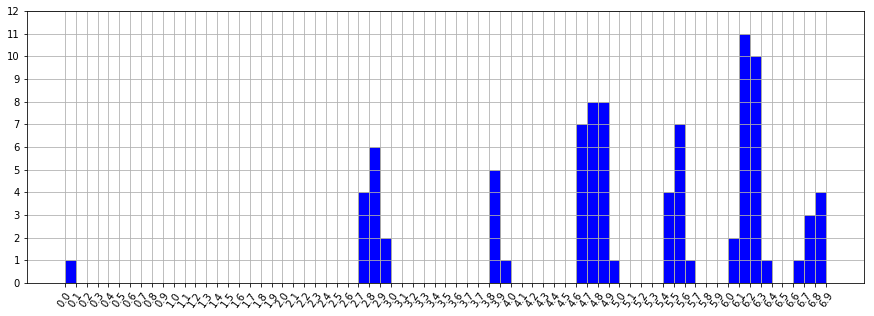

In [67]:
fig, ax = plt.subplots(figsize=(15, 5))
counts, bins, patches = ax.hist(data[0].distance[data[0].distance < 7], facecolor='blue', edgecolor='gray', bins=70, )

# Set the ticks to be at the edges of the bins.
ax.set_yticks(np.linspace(0, 12, 13), minor=False)
ax.set_xticks(bins, minor=False)
ax.set_xticklabels(np.round(bins, 1), rotation=55)
ax.grid()